In [93]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [130]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [97]:
train_data = pd.read_csv("KDDTrain+.txt" , sep = "," , encoding = 'utf-8')
test_data  = pd.read_csv("KDDTest+.txt" , sep = "," , encoding = 'utf-8')

In [98]:
train_data

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [99]:
test_data

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [100]:
columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", 
    "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", 
    "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files", 
    "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", 
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", 
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", 
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", 
    "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate",
    "attack", "difficulty"
]

train_data.columns = columns
test_data.columns = columns

# Getting familiarized with the data

In [101]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [102]:
train_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [103]:
train_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [104]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [105]:
train_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [106]:
train_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [107]:
numerical_columns = train_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = train_data.select_dtypes(include=[object]).columns.tolist()

In [108]:
print("Numerical Columns: ",numerical_columns)
print("Categorical Columns: ",categorical_columns)

Numerical Columns:  ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'difficulty']
Categorical Columns:  ['protocol_type', 'service', 'flag', 'attack']


In [109]:
combined_df = pd.concat([train_data, test_data], ignore_index=True)
print("Combined DataFrame shape:", combined_df.shape)

Combined DataFrame shape: (148515, 43)


In [110]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148515 entries, 0 to 148514
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148515 non-null  int64  
 1   protocol_type                148515 non-null  object 
 2   service                      148515 non-null  object 
 3   flag                         148515 non-null  object 
 4   src_bytes                    148515 non-null  int64  
 5   dst_bytes                    148515 non-null  int64  
 6   land                         148515 non-null  int64  
 7   wrong_fragment               148515 non-null  int64  
 8   urgent                       148515 non-null  int64  
 9   hot                          148515 non-null  int64  
 10  num_failed_logins            148515 non-null  int64  
 11  logged_in                    148515 non-null  int64  
 12  num_compromised              148515 non-null  int64  
 13 

In [111]:
combined_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [112]:
combined_df.duplicated().sum()

np.int64(610)

In [113]:
combined_df.drop_duplicates(inplace=True)
combined_df.duplicated().sum()

np.int64(0)

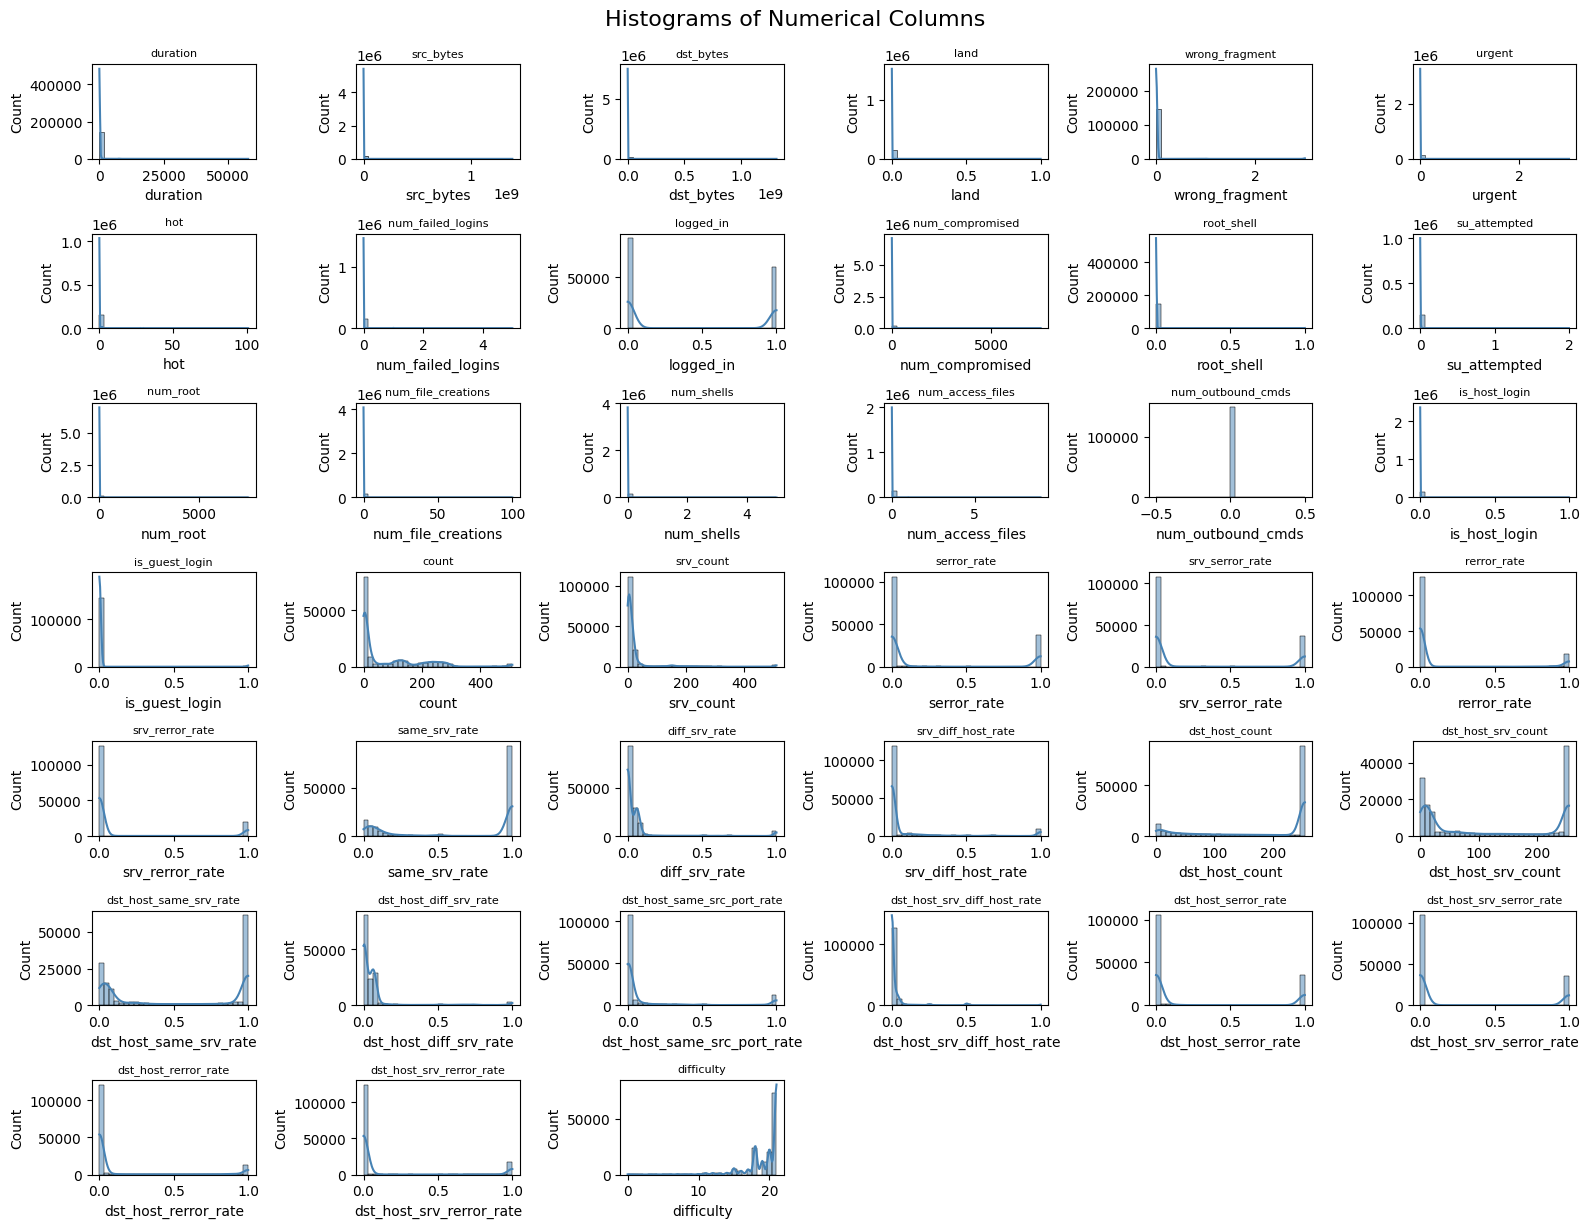

In [114]:
#Histogram for numerical features
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns):
    plt.subplot(7, 6, i+1)
    sns.histplot(combined_df[col], bins=30, kde=True, color='steelblue')
    plt.title(col, fontsize=8)
    plt.tight_layout()
plt.suptitle("Histograms of Numerical Columns", fontsize=16, y=1.02)
plt.show()

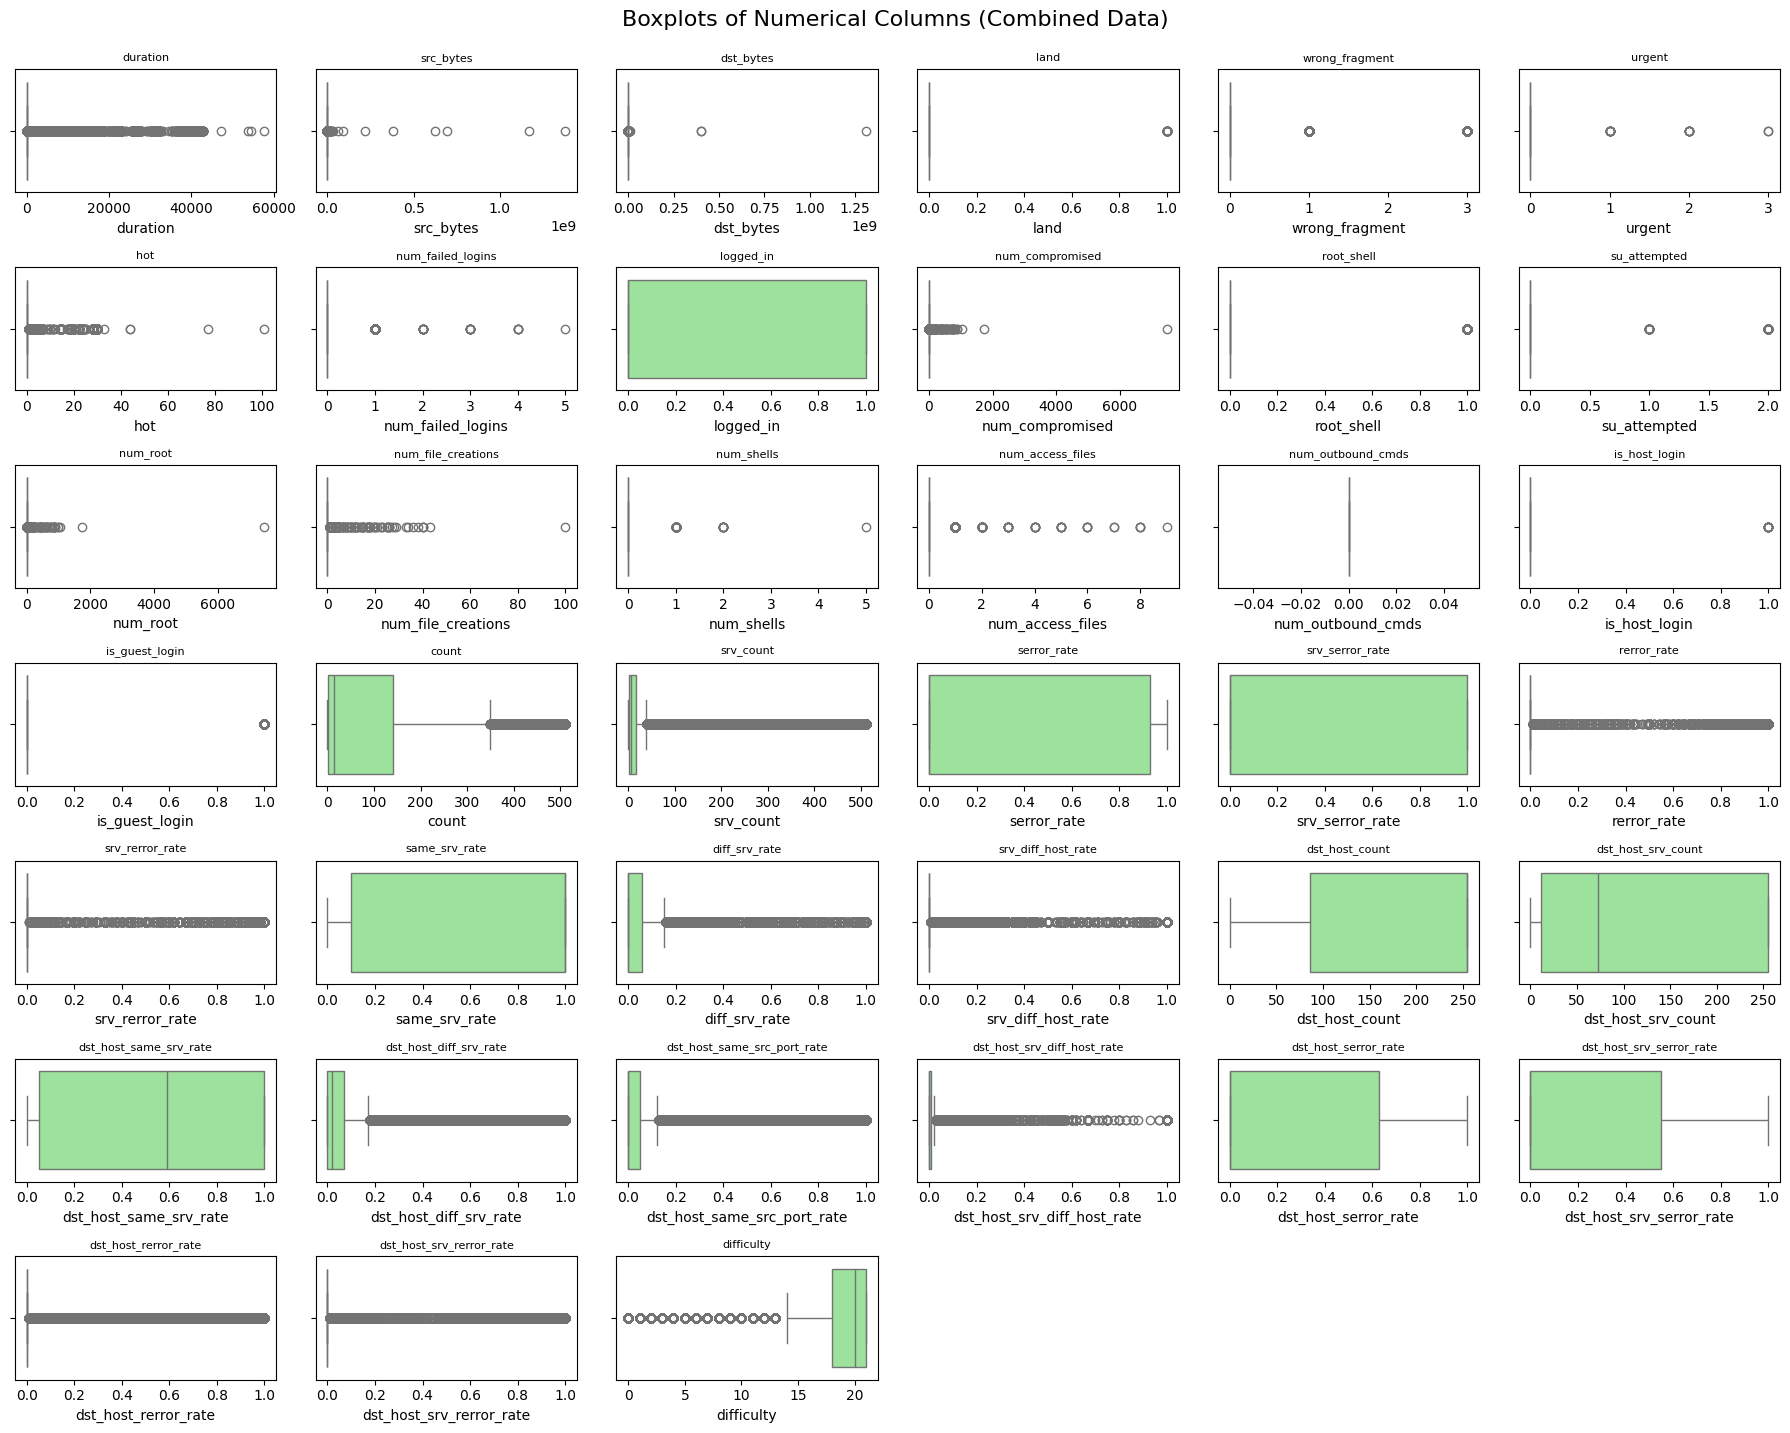

In [115]:
# 2. Boxplots for numerical features to check for outliers
plt.figure(figsize=(18, 14))
for i, col in enumerate(numerical_columns):
    plt.subplot(7, 6, i+1)
    sns.boxplot(x=combined_df[col], color='lightgreen')
    plt.title(col, fontsize=8)
    plt.tight_layout()
plt.suptitle("Boxplots of Numerical Columns (Combined Data)", fontsize=16, y=1.02)
plt.show()

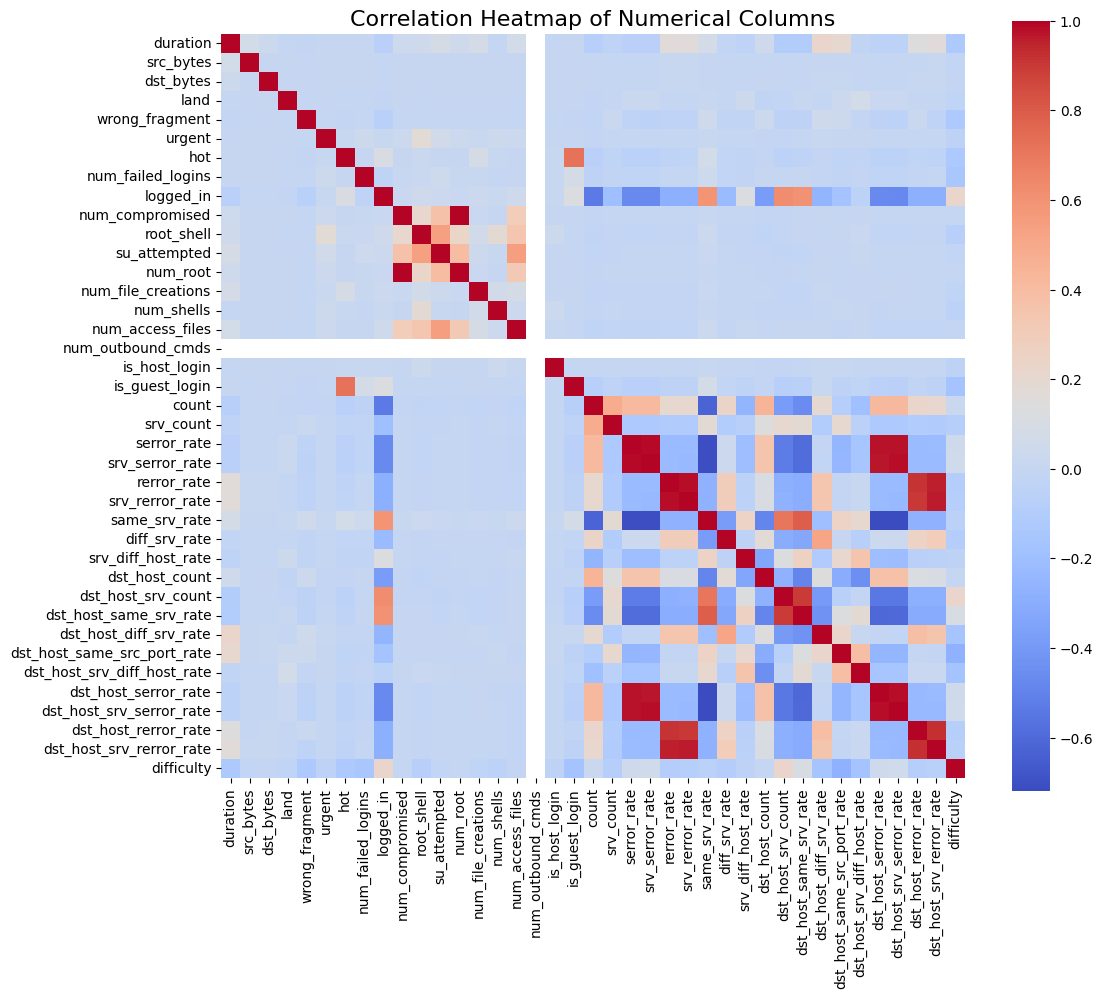

In [116]:
# 3. Correlation Heatmap for numerical features
plt.figure(figsize=(12, 10))
corr_matrix = combined_df[numerical_columns].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", square=True)
plt.title("Correlation Heatmap of Numerical Columns", fontsize=16)
plt.show()

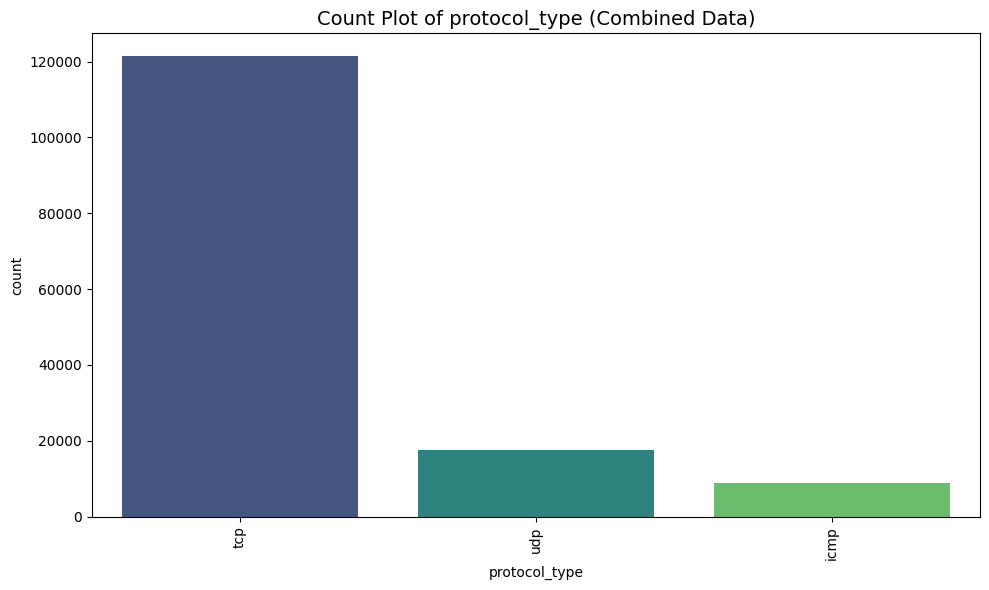

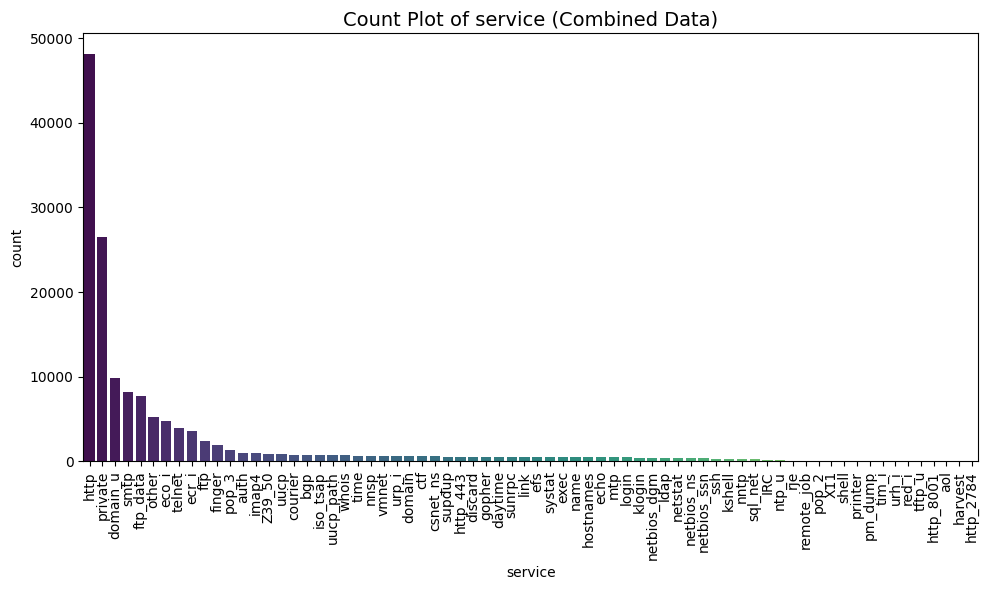

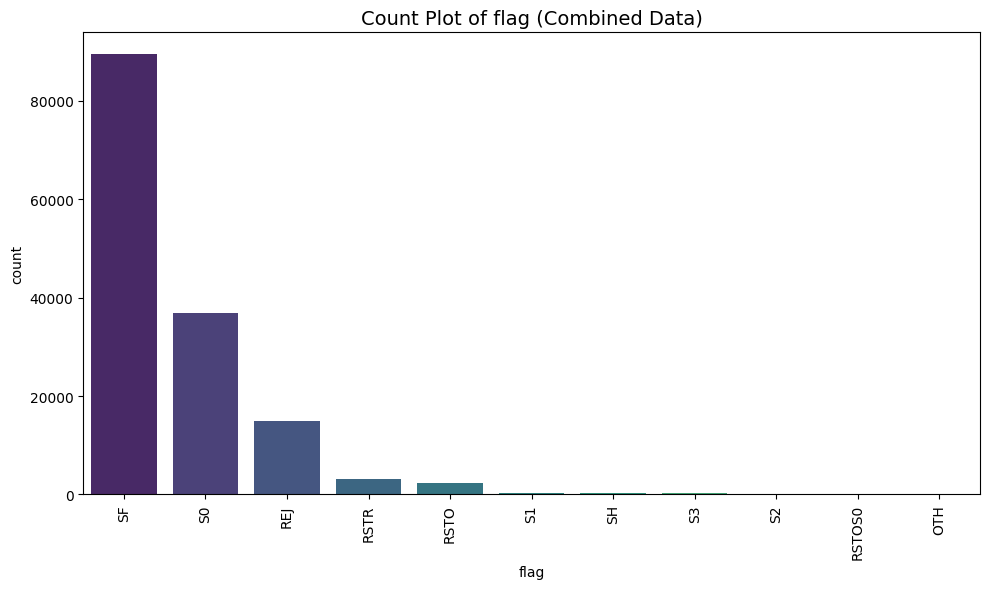

In [117]:
# 4. Count plots for categorical features
for col in categorical_columns:
    if col == "attack":
        continue
    plt.figure(figsize=(10, 6))
    order = combined_df[col].value_counts().index
    sns.countplot(data=combined_df, x=col, order=order, palette="viridis")
    plt.title(f"Count Plot of {col} (Combined Data)", fontsize=14)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

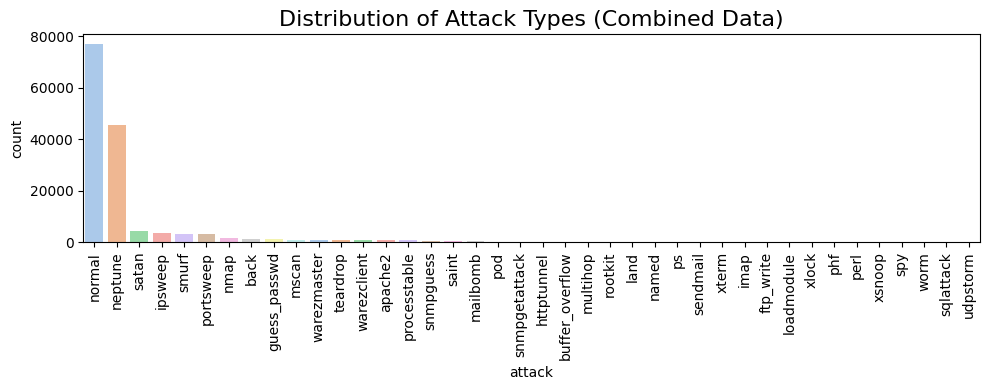

In [118]:
# 5. Distribution of attack types
plt.figure(figsize=(10, 4))
order = combined_df['attack'].value_counts().index
sns.countplot(data=combined_df, x='attack', order=order, palette="pastel")
plt.title("Distribution of Attack Types (Combined Data)", fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Data Transformation

In [119]:
combined_df['binary_class'] = combined_df['attack'].apply(lambda x: 0 if x.lower().strip() == 'normal' else 1)

In [120]:
# Separate out your target column from the features.
y = combined_df['binary_class']
X = combined_df.drop(columns=['attack', 'difficulty', 'binary_class'])

numerical_columns = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = X.select_dtypes(include=[object]).columns.tolist()

In [121]:
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat = enc.fit_transform(X[categorical_columns])
X_cat_cols = enc.get_feature_names_out(categorical_columns)

# Convert numeric columns to NumPy array
X_num = X[numerical_columns].values

# Concatenate numeric and encoded categorical features.
X_transformed = np.hstack([X_num, X_cat])

In [122]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.4, random_state=42, stratify=y
)

print("Final transformed feature shape:", X_scaled.shape)
print("y shape:", y.shape)
print("Training set size:", X_train.shape, "Test set size:", X_test.shape)

Final transformed feature shape: (147905, 122)
y shape: (147905,)
Training set size: (88743, 122) Test set size: (59162, 122)


In [124]:
print("X_train sample:")
print(pd.DataFrame(X_train).head())

print("\ny_train sample:")
print(y_train.head())

# Similarly for the test set
print("\nX_test sample:")
print(pd.DataFrame(X_test).head())

print("\ny_test sample:")
print(y_test.head())

X_train sample:
        0         1         2         3         4         5        6    \
0 -0.112716 -0.007441 -0.004608 -0.014004 -0.085119 -0.010425 -0.09417   
1 -0.112716 -0.007449 -0.004624 -0.014004 -0.085119 -0.010425 -0.09417   
2 -0.112716 -0.007450 -0.004624 -0.014004 -0.085119 -0.010425 -0.09417   
3 -0.112716 -0.007450 -0.004624 -0.014004 -0.085119 -0.010425 -0.09417   
4 -0.112716 -0.007404 -0.004240 -0.014004 -0.085119 -0.010425 -0.09417   

        7         8         9    ...       112       113       114       115  \
0 -0.059956 -0.823843 -0.011492  ... -0.335564 -0.126485 -0.026654 -0.145881   
1 -0.059956 -0.823843 -0.011492  ... -0.335564 -0.126485 -0.026654 -0.145881   
2 -0.059956 -0.823843 -0.011492  ... -0.335564 -0.126485 -0.026654 -0.145881   
3 -0.059956 -0.823843 -0.011492  ... -0.335564 -0.126485 -0.026654 -0.145881   
4 -0.059956  1.213824 -0.011492  ... -0.335564 -0.126485 -0.026654 -0.145881   

        116       117    118       119       120       121

In [125]:
print("Original training class distribution:")
print(y_train.value_counts())

Original training class distribution:
binary_class
0    46180
1    42563
Name: count, dtype: int64


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [127]:
# Initialize the feature selector to select the top 100 features based on mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=100)

# Fit the selector on the training data and transform both train and test sets
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print("Original feature dimension:", X_train.shape[1])
print("Selected feature dimension:", X_train_selected.shape[1])

# Optionally, inspect which features were selected and their corresponding scores.
selected_indices = selector.get_support(indices=True)
selected_scores = selector.scores_[selected_indices]
print("\nSelected feature indices:", selected_indices)
print("Feature scores for the selected features:", selected_scores)

Original feature dimension: 122
Selected feature dimension: 100

Selected feature indices: [  0   1   2   3   4   5   6   7   8   9  11  12  13  15  19  20  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  42  43  45  46  47  48  49  50  51  52  53  55  56  57  58  59  60  61
  62  64  65  67  69  70  71  72  73  74  77  78  79  80  81  82  83  84
  85  88  89  90  92  93  95  96  97  98 101 104 105 106 107 108 109 110
 111 112 113 115 116 117 118 119 120 121]
Feature scores for the selected features: [0.02761805 0.54160852 0.4332104  0.0013528  0.00705711 0.00103432
 0.011585   0.00601853 0.25581915 0.00456716 0.00262154 0.00190625
 0.0020063  0.00097656 0.23822531 0.04847325 0.23580939 0.22494418
 0.05676474 0.0534865  0.32021344 0.3242029  0.09492788 0.12973142
 0.30257955 0.27883024 0.2602706  0.12906718 0.17756365 0.23940176
 0.23625113 0.05292193 0.06773614 0.02436425 0.00240083 0.02664045
 0.00239208 0.00780028 0.00226661 0.00403413 0.00532536 0.


Training AdaBoost...
AdaBoost Accuracy: 0.9564
AdaBoost Confusion Matrix:
[[29866   920]
 [ 1658 26718]]
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0     0.9474    0.9701    0.9586     30786
           1     0.9667    0.9416    0.9540     28376

    accuracy                         0.9564     59162
   macro avg     0.9571    0.9558    0.9563     59162
weighted avg     0.9567    0.9564    0.9564     59162



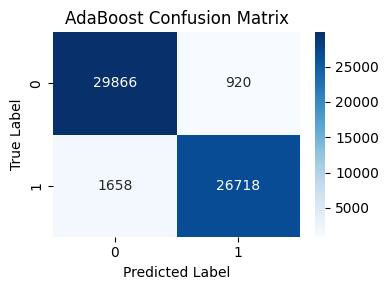


Training Extra Trees...
Extra Trees Accuracy: 0.9953
Extra Trees Confusion Matrix:
[[30685   101]
 [  180 28196]]
Extra Trees Classification Report:
              precision    recall  f1-score   support

           0     0.9942    0.9967    0.9954     30786
           1     0.9964    0.9937    0.9950     28376

    accuracy                         0.9953     59162
   macro avg     0.9953    0.9952    0.9952     59162
weighted avg     0.9953    0.9953    0.9953     59162



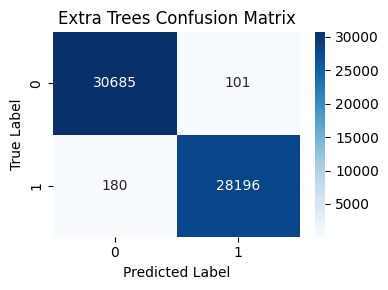


Training Gradient Boost...
Gradient Boost Accuracy: 0.9896
Gradient Boost Confusion Matrix:
[[30505   281]
 [  332 28044]]
Gradient Boost Classification Report:
              precision    recall  f1-score   support

           0     0.9892    0.9909    0.9901     30786
           1     0.9901    0.9883    0.9892     28376

    accuracy                         0.9896     59162
   macro avg     0.9897    0.9896    0.9896     59162
weighted avg     0.9896    0.9896    0.9896     59162



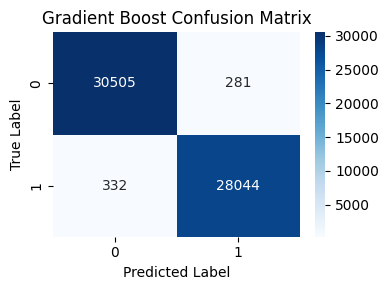


Training Random Forest...
Random Forest Accuracy: 0.9955
Random Forest Confusion Matrix:
[[30693    93]
 [  175 28201]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0     0.9943    0.9970    0.9957     30786
           1     0.9967    0.9938    0.9953     28376

    accuracy                         0.9955     59162
   macro avg     0.9955    0.9954    0.9955     59162
weighted avg     0.9955    0.9955    0.9955     59162



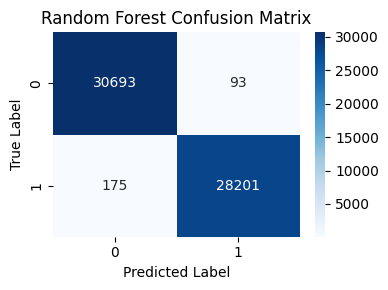


Training MLP...
MLP Accuracy: 0.9903
MLP Confusion Matrix:
[[30555   231]
 [  341 28035]]
MLP Classification Report:
              precision    recall  f1-score   support

           0     0.9890    0.9925    0.9907     30786
           1     0.9918    0.9880    0.9899     28376

    accuracy                         0.9903     59162
   macro avg     0.9904    0.9902    0.9903     59162
weighted avg     0.9903    0.9903    0.9903     59162



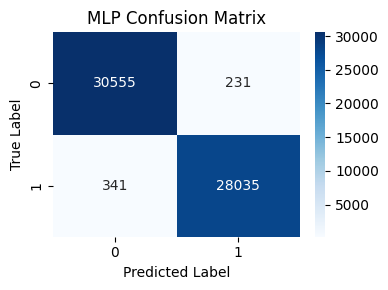


Training Linear Regression...
Linear Regression Accuracy (thresholded at 0.5): 0.9455
Linear Regression Confusion Matrix:
[[29782  1004]
 [ 2219 26157]]
Linear Regression Classification Report:
              precision    recall  f1-score   support

           0     0.9307    0.9674    0.9487     30786
           1     0.9630    0.9218    0.9420     28376

    accuracy                         0.9455     59162
   macro avg     0.9468    0.9446    0.9453     59162
weighted avg     0.9462    0.9455    0.9455     59162



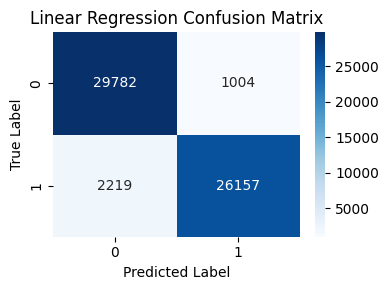


Summary of Accuracies:
AdaBoost: 0.9564
Extra Trees: 0.9953
Gradient Boost: 0.9896
Random Forest: 0.9955
MLP: 0.9903
Linear Regression: 0.9455


In [131]:
# Initialize the classifiers
models = {
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "Gradient Boost": GradientBoostingClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "MLP": MLPClassifier(max_iter=300, random_state=42)  # increased max_iter for convergence
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_selected, y_train)
    preds = model.predict(X_test_selected)
    
    # Accuracy
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    print(f"{name} Confusion Matrix:\n{cm}")
    
    # Classification Report
    cr = classification_report(y_test, preds, digits=4)
    print(f"{name} Classification Report:\n{cr}")
    
    # Plot Confusion Matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

# Linear Regression as classifier (thresholded at 0.5)
print("\nTraining Linear Regression...")
lr = LinearRegression()
lr.fit(X_train_selected, y_train)
lr_preds = lr.predict(X_test_selected)
lr_preds_class = np.where(lr_preds > 0.5, 1, 0)

lr_acc = accuracy_score(y_test, lr_preds_class)
results["Linear Regression"] = lr_acc
print(f"Linear Regression Accuracy (thresholded at 0.5): {lr_acc:.4f}")

lr_cm = confusion_matrix(y_test, lr_preds_class)
print(f"Linear Regression Confusion Matrix:\n{lr_cm}")
lr_cr = classification_report(y_test, lr_preds_class, digits=4)
print(f"Linear Regression Classification Report:\n{lr_cr}")

plt.figure(figsize=(4, 3))
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Linear Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Finally, print a summary of accuracies
print("\nSummary of Accuracies:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")

In [132]:
from sklearn.inspection import permutation_importance



Visualizing feature importance for AdaBoost:


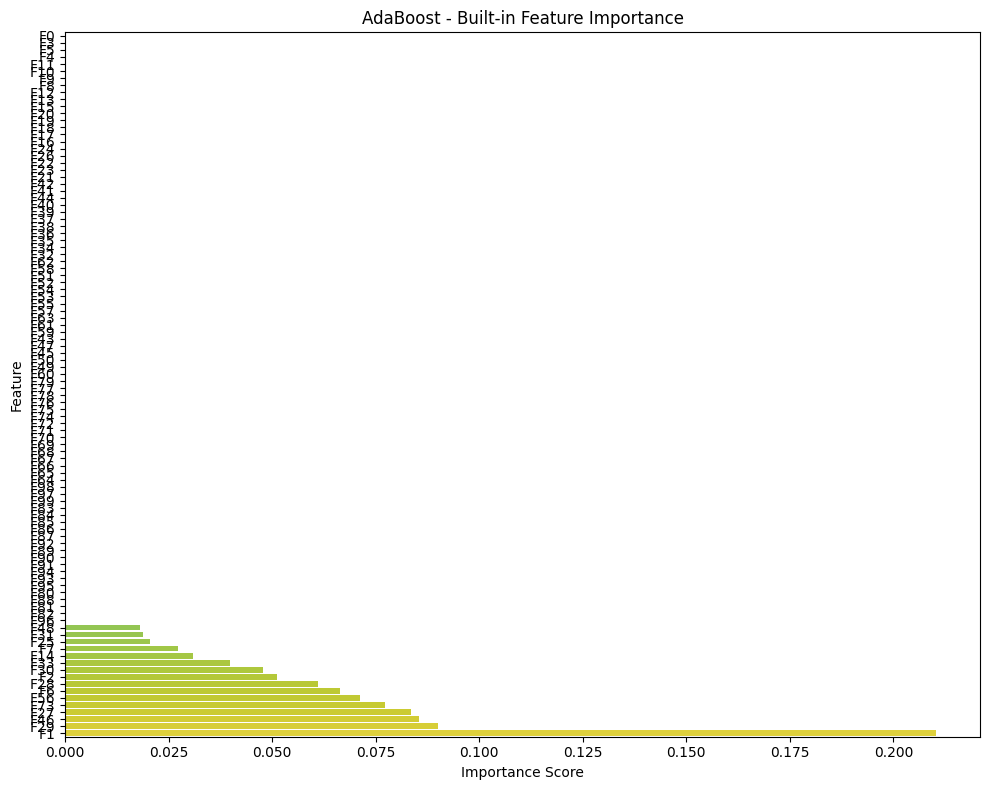


Visualizing feature importance for Extra Trees:


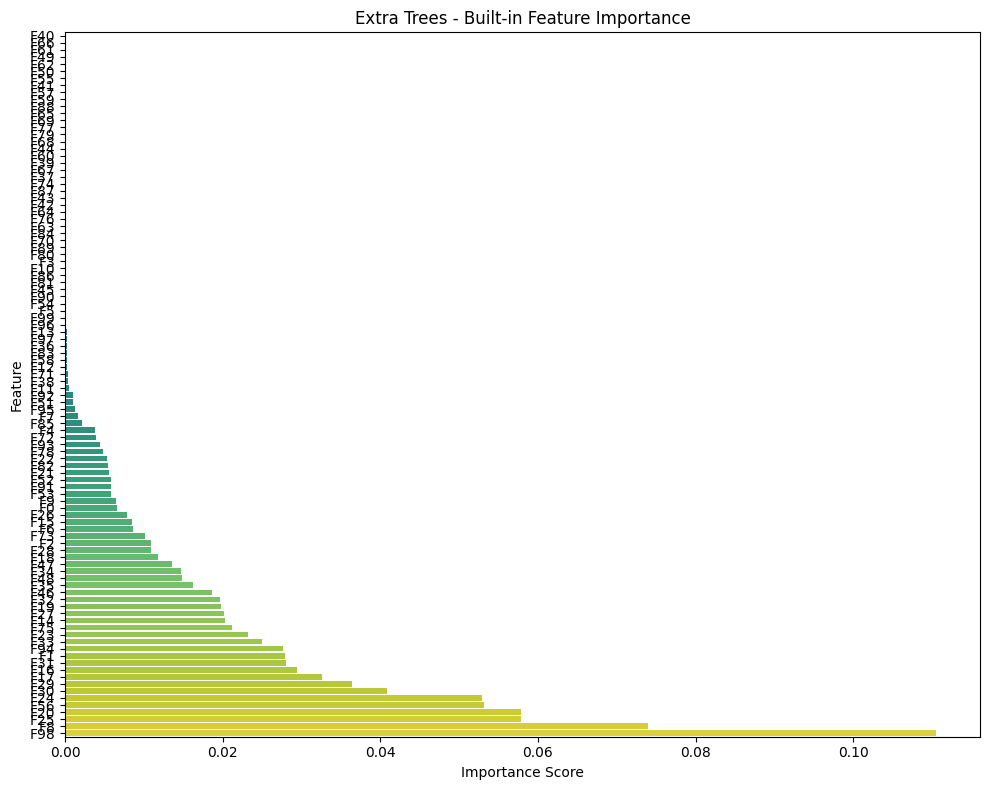


Visualizing feature importance for Gradient Boost:


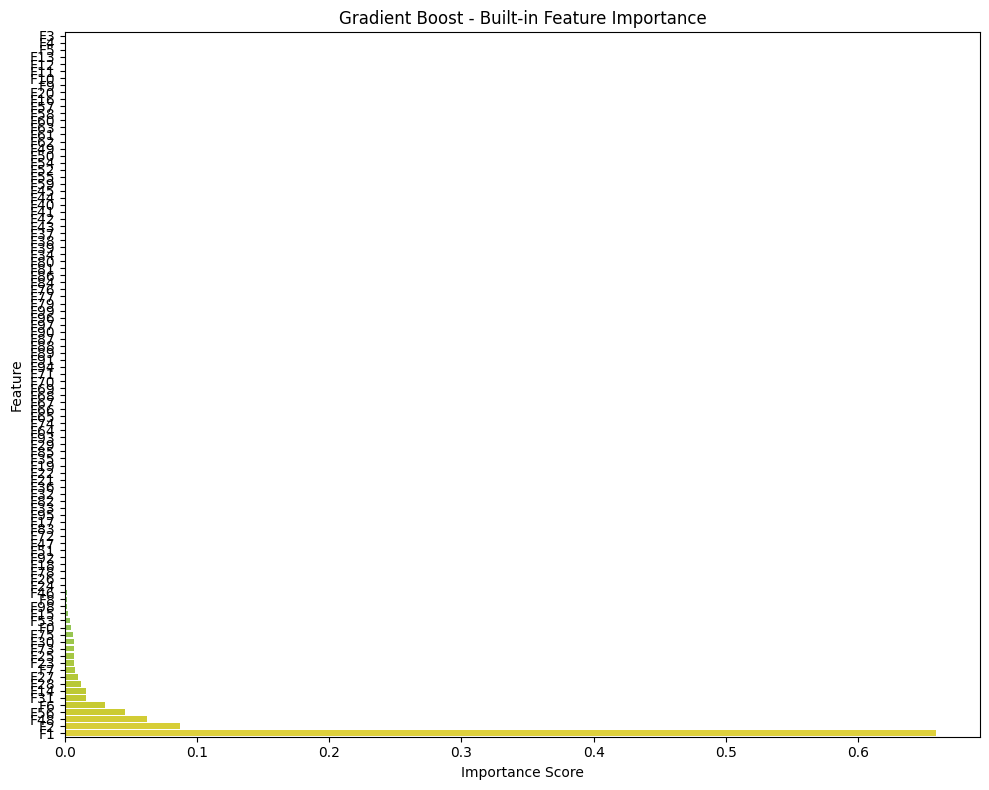


Visualizing feature importance for Random Forest:


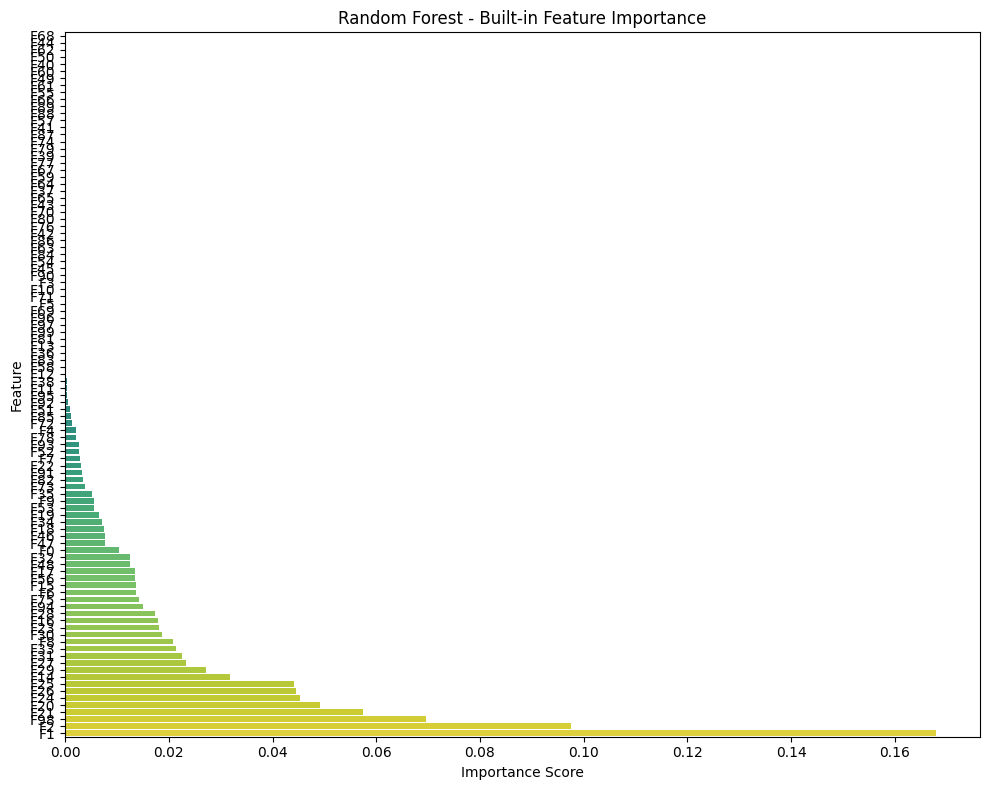


Visualizing feature importance for MLP:
MLP does not have built-in feature importances. Computing permutation importance.


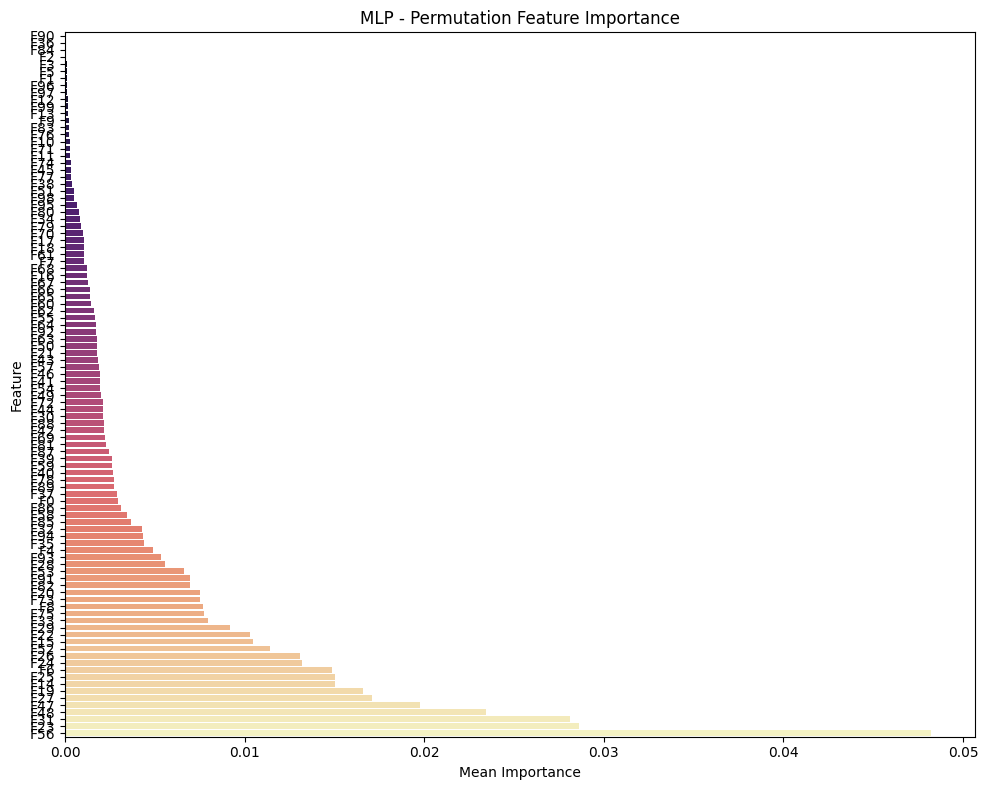


Permutation importance for MLP (even if built-in feature importances are not available):


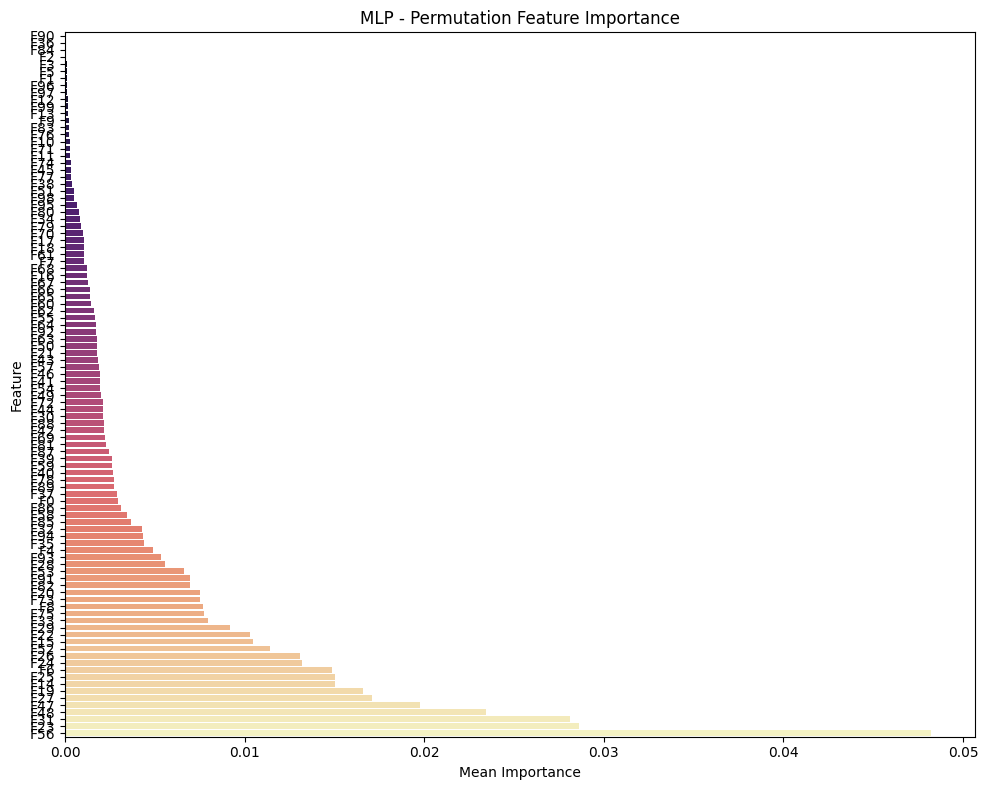

In [133]:

# Create generic feature names for the selected feature space
feature_names = [f"F{i}" for i in range(X_train_selected.shape[1])]

# Function to plot built-in feature importance
def plot_feature_importance(model, model_name):
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
        fi_df = pd.DataFrame({"Feature": feature_names, "Importance": importance})
        fi_df = fi_df.sort_values("Importance", ascending=True)
        plt.figure(figsize=(10, 8))
        sns.barplot(x="Importance", y="Feature", data=fi_df, palette="viridis")
        plt.title(f"{model_name} - Built-in Feature Importance")
        plt.xlabel("Importance Score")
        plt.tight_layout()
        plt.show()
    else:
        print(f"{model_name} does not have a built-in feature_importances_ attribute.")

# Function to plot permutation feature importance
def plot_permutation_importance(model, model_name, X, y):
    r = permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
    perm_importance = r.importances_mean
    fi_df = pd.DataFrame({"Feature": feature_names, "Perm Importance": perm_importance})
    fi_df = fi_df.sort_values("Perm Importance", ascending=True)
    plt.figure(figsize=(10, 8))
    sns.barplot(x="Perm Importance", y="Feature", data=fi_df, palette="magma")
    plt.title(f"{model_name} - Permutation Feature Importance")
    plt.xlabel("Mean Importance")
    plt.tight_layout()
    plt.show()

# Loop through each model and plot feature importance
for name, model in models.items():
    print(f"\nVisualizing feature importance for {name}:")
    # If the model has built-in feature importance, plot that first.
    if hasattr(model, "feature_importances_"):
        plot_feature_importance(model, name)
    else:
        print(f"{name} does not have built-in feature importances. Computing permutation importance.")
        plot_permutation_importance(model, name, X_test_selected, y_test)

# Additionally, you can compute permutation importance for a specific model even if it has built-in scores.
# For example, for the MLP model:
print("\nPermutation importance for MLP (even if built-in feature importances are not available):")
plot_permutation_importance(models["MLP"], "MLP", X_test_selected, y_test)